In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Wczytanie danych

In [2]:
df = pd.read_csv("../../clustering.csv", header = None)

In [3]:
df.head()

,0,1
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


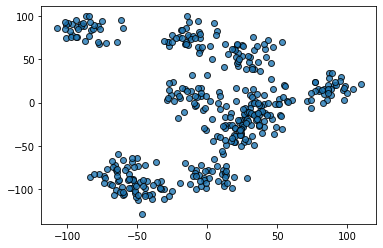

In [5]:
plt.scatter(df[0], df[1], alpha=0.8, edgecolor = "black")

In [6]:
def generate_models(Model, **params):
    figs = []
    inters = []
    silscores = []
    for i in range(2,20):
        fig = plt.figure()
        model = Model(n_clusters=i, **params)
        y_pred = model.fit_predict(df)
        
        plt.scatter(df[0], df[1], c = y_pred, alpha=0.8, edgecolor = "black")
        
        if len(params) == 0:
            plt.title("{}, n_clusters = {}".format(Model.__name__, i))
        else:
            plt.title("{}, n_clusters = {}, {}".format(Model.__name__, i, params))
        figs.append(fig)
        
        if hasattr(model, 'inertia_'):
            inters.append(model.inertia_)
        
        sscore = silhouette_score(df, y_pred)
        silscores.append(sscore)
        
    return figs, inters, silscores

In [7]:
def plot_metric(score):
    plt.plot(range(2,20), score, '-o')
    plt.xlabel('number of clusters, k')
    plt.ylabel('score')
    plt.xticks(range(2,20))
    plt.show()

# Kmeans
Do wybrania liczby klastrów użyjemy metody łokcia i silhouette_score

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
%%capture
figs, inters, silscores = generate_models(KMeans)

## Metoda łokcia

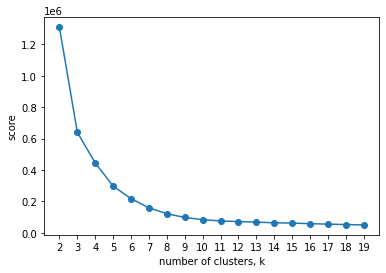

In [10]:
plot_metric(inters)

Trudno zauważyć zdecydowane 'przegięcie' na wykresie, gdzieś pomiędzy 4-6. Zobaczmy jak wygląda podział dla 5

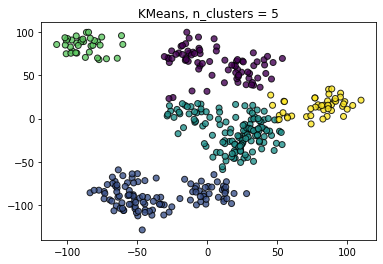

In [11]:
figs[3]

## Metoda silhouette_score
Im bliżej 1 tym model jest lepszy. Z ciekawości zobaczmy czy silhouette_score będzie sugerował podobną liczę klastrów co metoda łokcia

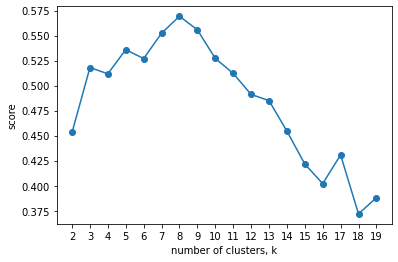

In [12]:
plot_metric(silscores)

Metoda silhouette_score zdecydowanie daje wynik 8 klastrów. Zobaczmy ten podział

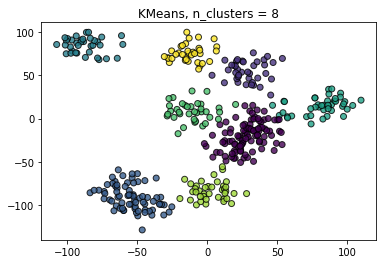

In [13]:
figs[6]

# AgglomerativeClustering
Do jej oceny użyjemy silhouette_score

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
%%capture
figs, inters, silscores = generate_models(AgglomerativeClustering)

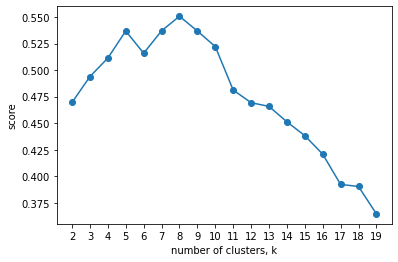

In [16]:
plot_metric(silscores)

Najlepiej wypadło 8, chociaż 5 nie jest wiele gorszy.

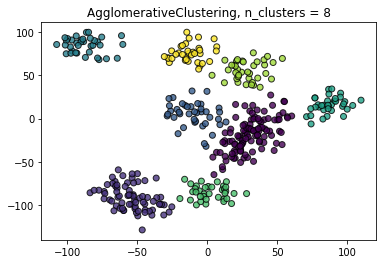

In [17]:
figs[6]

Zobaczmy jak wypada ten sam algorytm z innym parametrem linkage

In [18]:
%%capture
figs, inters, silscores = generate_models(AgglomerativeClustering, linkage="complete")

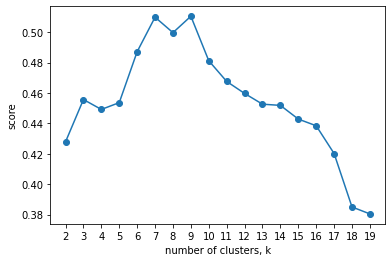

In [19]:
plot_metric(silscores)

Tutaj praktycznie na równi 7 i 9.

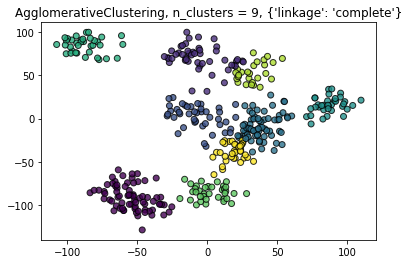

In [20]:
figs[7]

In [21]:
%%capture
figs, inters, silscores = generate_models(AgglomerativeClustering, linkage="average")

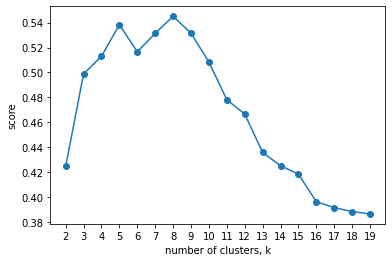

In [22]:
plot_metric(silscores)

Najlepiej wypada ponownie 8, zaraz po nim 4

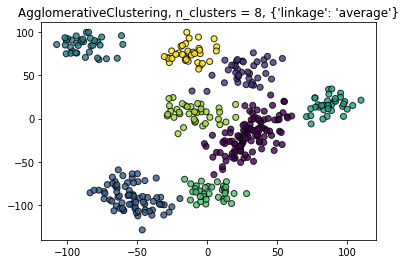

In [23]:
figs[6]

# Podsumowanie

Metoda łokcia nie jest prosta do zrobienia, ale nie zawsze da się ją dobrze odczytać. Metoda silhouette_score jest prostrza do zinterpretowania i zautomatyzowania(nie trzeba szukać wizualnie przegięcia na wykresie, wystarczy wziąć argmax()). W tym przypadku wychodzi na to, że najodpowiedniejszą liczbą klastrów jest 8.

Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia
się z przedmiotu Wstęp do Uczenia Maszynowego, została wykonana przeze mnie samodzielnie.
Hanna Zdulska